# Project: Impact of Women in the Workforce - Gapminder
Catherine Taft 2022

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


First I'd like to note that this is not my report - my report is a separate pdf. Here I am just talking through the coding part of the analysis process.

I wanted to focus on women in the workforce and look at how the proportion of women in the workforce has changed over time in various regions, and how it's impacted birthrates, so I chose four datasets from Gapminder's data. One has the overall fertility rates (number of women per child), one has the education rates for women between 15 and 44 (mean years in school), one has the percentage of the workforce of any gender contributing to a family income, and one has the proportion of the workforce that is female. All of these data sets are formatted so that the columns are years, and the data is arranged per country. 


### Question(s) for Analysis

Again this is not my report so I will not talk about it in depth in the notebook, but the questions I'm looking at are:

1.) How has the rate of women joining the workforce increased over time, and how does this compare across regions?
    - For this question I will use the full female labor participation dataframe and compare some different global regions.

2.) Is there a relationship between the average education level of women, birthrates, and the rate of women joining the workforce? How is this different in different regions?
    - For this last question I'll compare the data for rates of female education, the overall fertility rate (avg number of children per woman) and the female labor participation rates. I'll use the common years for all three datasets, which is   1990-2008.

In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'axes.facecolor':'lightblue'})
sns.set(rc={'figure.figsize':(20,10)})

%matplotlib inline

In [608]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0;

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [791]:
total_fertility_df = pd.read_csv('children_per_woman_total_fertility.csv')
female_labor_participation_df = pd.read_csv('females_aged_25_54_labor_force_participation_rate_percent.csv')
mean_years_school_women_15_44_df = pd.read_csv('mean_years_in_school_women_of_reproductive_age_15_to_44.csv')

In [792]:
total_fertility_df.head(5)
#note - the region columns for all the below were added by me during the process and now appear since I reran the cells later

,country,region,1799,1800,1801,1802,1803,1804,1805,1806,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,middle east,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,europe,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,africa,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,africa,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,caribbean,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


In [612]:
female_labor_participation_df.head(5)

,country,region,1989,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,middle east,17.7,17.7,17.8,17.8,17.8,17.9,17.7,17.5,...,17.6,18.0,18.5,19.6,20.7,22.0,23.2,24.6,25.0,25.5
1,Albania,europe,69.0,72.5,73.3,72.3,71.4,70.0,69.0,70.2,...,68.5,74.3,69.5,65.8,66.2,71.1,72.6,71.4,75.4,77.3
2,Algeria,africa,10.6,10.7,10.8,11.0,11.2,11.5,11.8,12.3,...,20.1,21.3,22.4,23.6,21.7,22.7,23.7,24.7,24.2,23.9
3,Angola,africa,88.0,88.0,88.0,88.2,88.3,88.3,88.2,88.2,...,88.2,88.2,88.1,88.1,88.1,88.1,88.2,88.3,88.4,88.5
4,Argentina,latin america,61.2,62.5,63.7,65.0,66.1,66.2,67.0,68.0,...,67.2,67.6,68.0,67.9,66.7,67.7,68.7,69.6,71.7,72.4


In [613]:
mean_years_school_women_15_44_df.head(5)

,country,region,1969,1970,1971,1972,1973,1974,1975,1976,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,middle east,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8
1,Albania,europe,5.6,5.7,5.9,6.0,6.2,6.3,6.5,6.6,...,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7
2,Algeria,africa,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,...,5.8,5.9,6.1,6.2,6.4,6.5,6.7,6.8,6.9,7.1
3,Angola,africa,0.9,1.0,1.0,1.1,1.1,1.2,1.2,1.3,...,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5
4,Antigua and Barbuda,caribbean,8.1,8.3,8.5,8.7,8.8,9.0,9.2,9.4,...,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.3,13.4,13.5


I really want to analyze these by region, not really specific countries, so I realized I needed to add a column to each dataframe to include geographic region. I did this manually and separated countries into the following regions: Europe, Asia, North America, Latin America, Caribbean, Middle East, Africa, and Oceania. I added that here but it shows up in the heads I called above because I've since gone back and rerun those cells.

In [614]:
#I ran this for all dfs to make sure it worked and that there were no typos (I actually caught a couple typos this way).
mean_years_school_women_15_44_df['region'].unique()

array(['middle east', 'europe', 'africa', 'caribbean', 'latin america',
       'oceania', 'asia', 'north america'], dtype=object)


### Data Cleaning

The first thing I'm going to do is create the different dataframes I need for each question, as I'll be comparing different datasets with different years, and I only want the common years for comparison questions. Then I'm going to drop the rows that are not common between them. Having gone through these manually to add the region, most of them are the same but there are some small countries that were left out here and there.

Since I may be interested later in examining other parts of the individual datasets, I won't do any inplace edits and will just make new dataframes for each. I need to combine the first two columns (country and region) with the relevant year columns. First I got the index numbers of the relevant year columns, then combined them using np.r_. 

First I'll make to the two I need for question two, using the years 1990-2018. (note: For question 1 I'll just use the melted version of the female labor participation df I make below)

In [1011]:
#this and the following cell give me the column indices so I can do the slice.
index_lower = female_labor_participation_df.columns.get_loc('1990')
print(index_lower)

3


In [1012]:
index_upper = female_labor_participation_df.columns.get_loc('2018')
print(index_upper)

31


In [617]:
#this selects all rows and then the specific chunks of columns that I want and combines it into a new df
q2_female_labor_participation_1990_2018 = female_labor_participation_df.iloc[:, np.r_[:2, 3:32]]
q2_female_labor_participation_1990_2018.head(5)

,country,region,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,middle east,17.7,17.8,17.8,17.8,17.9,17.7,17.5,17.4,...,17.6,18.0,18.5,19.6,20.7,22.0,23.2,24.6,25.0,25.5
1,Albania,europe,72.5,73.3,72.3,71.4,70.0,69.0,70.2,69.3,...,68.5,74.3,69.5,65.8,66.2,71.1,72.6,71.4,75.4,77.3
2,Algeria,africa,10.7,10.8,11.0,11.2,11.5,11.8,12.3,12.8,...,20.1,21.3,22.4,23.6,21.7,22.7,23.7,24.7,24.2,23.9
3,Angola,africa,88.0,88.0,88.2,88.3,88.3,88.2,88.2,88.3,...,88.2,88.2,88.1,88.1,88.1,88.1,88.2,88.3,88.4,88.5
4,Argentina,latin america,62.5,63.7,65.0,66.1,66.2,67.0,68.0,68.6,...,67.2,67.6,68.0,67.9,66.7,67.7,68.7,69.6,71.7,72.4


I also chose to make a melted version of each because I thought it might be easier to use the data this way. 

In [618]:
#make melted dataframe
q2_female_labor_participation_1990_2018_melted = q2_female_labor_participation_1990_2018.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], var_name = 'year', value_name = 'labor_rate')
q2_female_labor_participation_1990_2018_melted.head(5)

,country,region,year,labor_rate
0,Afghanistan,middle east,1990,17.7
1,Albania,europe,1990,72.5
2,Algeria,africa,1990,10.7
3,Angola,africa,1990,88.0
4,Argentina,latin america,1990,62.5


Doing this actually converted the year into a string which may be a problem later so I'm going to add a line to each new one converting that to int.

In [619]:
#convert year column from string to int
q2_female_labor_participation_1990_2018_melted[['year']] = q2_female_labor_participation_1990_2018_melted[['year']].apply(pd.to_numeric)

In [793]:
q2_female_labor_participation_1990_2018_melted.dtypes

country        object
region         object
year            int64
labor_rate    float64
dtype: object

In [624]:
q3_female_labor_participation_1990_2008 = female_labor_participation_df.iloc[:, np.r_[:2, 3:22]]
#q3_female_labor_participation_1990_2008.head(5)

In [1018]:
#make melted dataframe, convert year column
q3_female_labor_participation_1990_2008_melted = q3_female_labor_participation_1990_2008.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'], var_name = 'year', value_name = 'labor_rate')
q3_female_labor_participation_1990_2008_melted[['year']] = q3_female_labor_participation_1990_2008_melted[['year']].apply(pd.to_numeric)
q3_female_labor_participation_1990_2008_melted.head(5)

,country,region,year,labor_rate
0,Afghanistan,middle east,1990,17.7
1,Albania,europe,1990,72.5
2,Algeria,africa,1990,10.7
3,Angola,africa,1990,88.0
4,Argentina,latin america,1990,62.5


In [627]:
q3_total_fertility_1990_2008 = total_fertility_df.iloc[:, np.r_[:2, 193:212]]
#q3_total_fertility_1990_2008.head(5)

In [1014]:
#make melted dataframe, convert year column
q3_total_fertility_1990_2008_melted = q3_total_fertility_1990_2008.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'], var_name = 'year', value_name = 'avg_children_per_woman')
q3_total_fertility_1990_2008_melted[['year']] = q3_total_fertility_1990_2008_melted[['year']].apply(pd.to_numeric)
q3_total_fertility_1990_2008_melted.dtypes

country                    object
region                     object
year                        int64
avg_children_per_woman    float64
dtype: object

In [630]:
q3_schooling_women_15_44_1990_2008 = mean_years_school_women_15_44_df.iloc[:, np.r_[:2, 23:42]]
#q3_schooling_women_15_44_1990_2008.head(5)

In [1019]:
#make melted dataframe, convert year column
q3_schooling_women_15_44_1990_2008_melted = q3_schooling_women_15_44_1990_2008.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'], var_name = 'year', value_name = 'avg yrs of school female 15-44')
q3_schooling_women_15_44_1990_2008_melted[['year']] = q3_schooling_women_15_44_1990_2008_melted[['year']].apply(pd.to_numeric)
q3_schooling_women_15_44_1990_2008_melted.head(5)

,country,region,year,avg yrs of school female 15-44
0,Afghanistan,middle east,1990,0.3
1,Albania,europe,1990,8.8
2,Algeria,africa,1990,4.3
3,Angola,africa,1990,2.5
4,Antigua and Barbuda,caribbean,1990,11.7


Now I'm going to create combined dataframes for question 2 based on the melted dataframes and will drop the resulting null values because I only want data that's common between all involved datasets. That's what I'll end up working with. 

In [1017]:
#create merged dataframe for question 2. 
q3_school_laborPart_fertility_merged = pd.merge(q3_female_labor_participation_1990_2008_melted, q3_schooling_women_15_44_1990_2008_melted, on=['country', 'region', 'year'], how='left').merge(q3_total_fertility_1990_2008_melted, on=['country', 'region', 'year'], how='left')
q3_school_laborPart_fertility_merged.head(5)

,country,region,year,labor_rate,avg yrs of school female 15-44,avg_children_per_woman
0,Afghanistan,middle east,1990,17.7,0.3,7.48
1,Albania,europe,1990,72.5,8.8,2.91
2,Algeria,africa,1990,10.7,4.3,4.48
3,Angola,africa,1990,88.0,2.5,7.19
4,Argentina,latin america,1990,62.5,9.5,2.95


In [636]:
#drop null values and confirm
q3_school_laborPart_fertility_merged.dropna(inplace=True)
q3_school_laborPart_fertility_merged.isna().sum()

country                           0
region                            0
year                              0
labor_rate                        0
avg yrs of school female 15-44    0
avg_children_per_woman            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: How has the rate of women joining the workforce over time changed and how does it compare across regions?

In [637]:
q2_female_labor_participation_1990_2018_melted.head()

,country,region,year,labor_rate
0,Afghanistan,middle east,1990,17.7
1,Albania,europe,1990,72.5
2,Algeria,africa,1990,10.7
3,Angola,africa,1990,88.0
4,Argentina,latin america,1990,62.5


Comparing the average female labor rates between 1990 and 2018 generally, between regions.

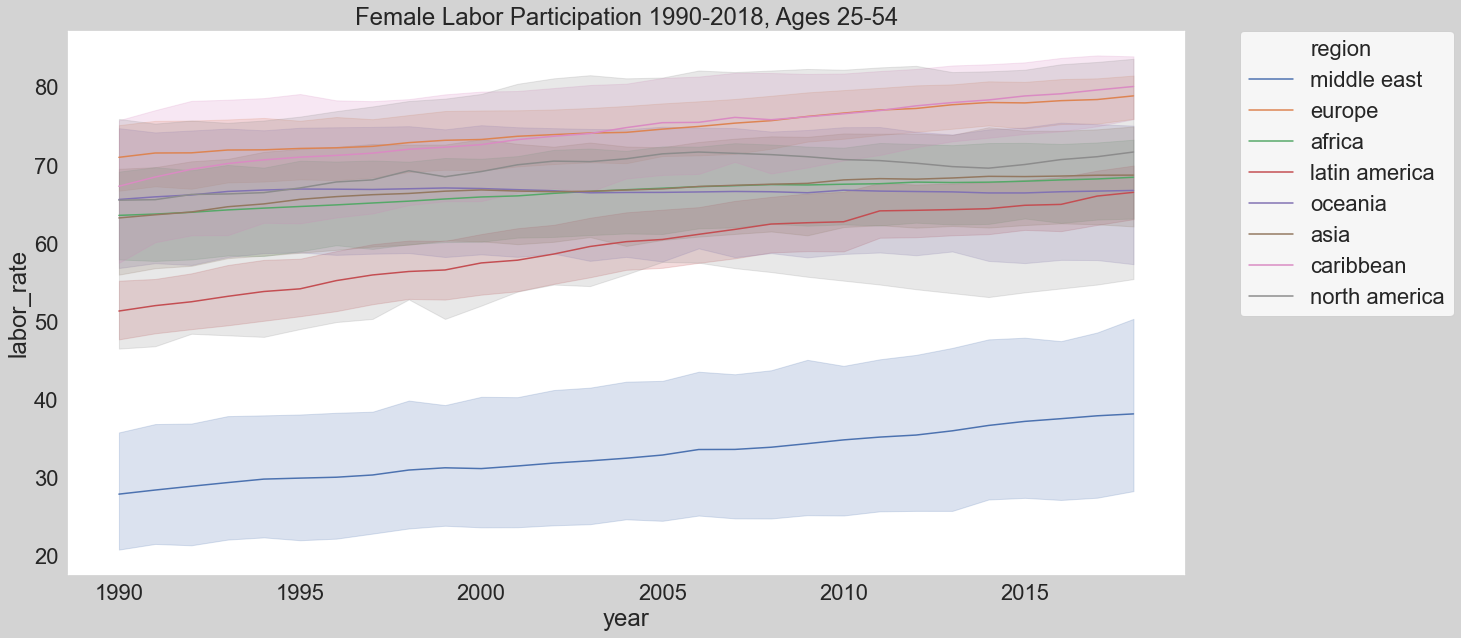

In [803]:
plt.figure(figsize=(20,10))
sns.set(rc={'figure.facecolor':'lightgray', 'axes.facecolor':'white'}, font_scale=2)
sns.lineplot('year', 'labor_rate', data=q2_female_labor_participation_1990_2018_melted, hue='region').set(title='Female Labor Participation 1990-2018, Ages 25-54')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Comparing 1990 to 2018 which is the full time frame of the data

In [740]:
labor_rate_90s = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['year'] == 1990]
labor_rate_2018 = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['year'] == 2018]

In [938]:
#Boxplot for female labor rates 1990
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
#ax = sns.boxplot(x='region', y='labor_rate', data=labor_rate_90s, palette='deep').set(title='Female Labor Rates in 1990 by Region')

<Figure size 1440x720 with 0 Axes>

In [937]:
#boxplot for female labor rates 2018
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
#ax = sns.boxplot(x='region', y='labor_rate', data=labor_rate_2018, palette='deep').set(title='Female Labor Rates in 2018 by Region')

<Figure size 1440x720 with 0 Axes>

Side by side boxplot of labor rates in 2018 and 1990

In [941]:
labor_rate_merged = pd.merge(labor_rate_90s, labor_rate_2018, on=['country', 'region'], how='left')
#labor_rate_merged.head()

In [932]:
labor_rate_merged_melted = labor_rate_merged.melt(id_vars = ['country', 'region', 'labor_rate_x', 'labor_rate_y'], value_vars=['year_x', 'year_y'], var_name = 'yearxy', value_name = 'year')
labor_rate_merged_melted.rename(columns = {'labor_rate_x':'1990', 'labor_rate_y':'2018'}, inplace = True)
labor_rate_merged_melted.drop(['yearxy', 'year'], axis=1, inplace=True)

In [940]:
labor_rate_melted_again = labor_rate_merged_melted.melt(id_vars = ['country','region'],var_name='year',value_name='labor rate')

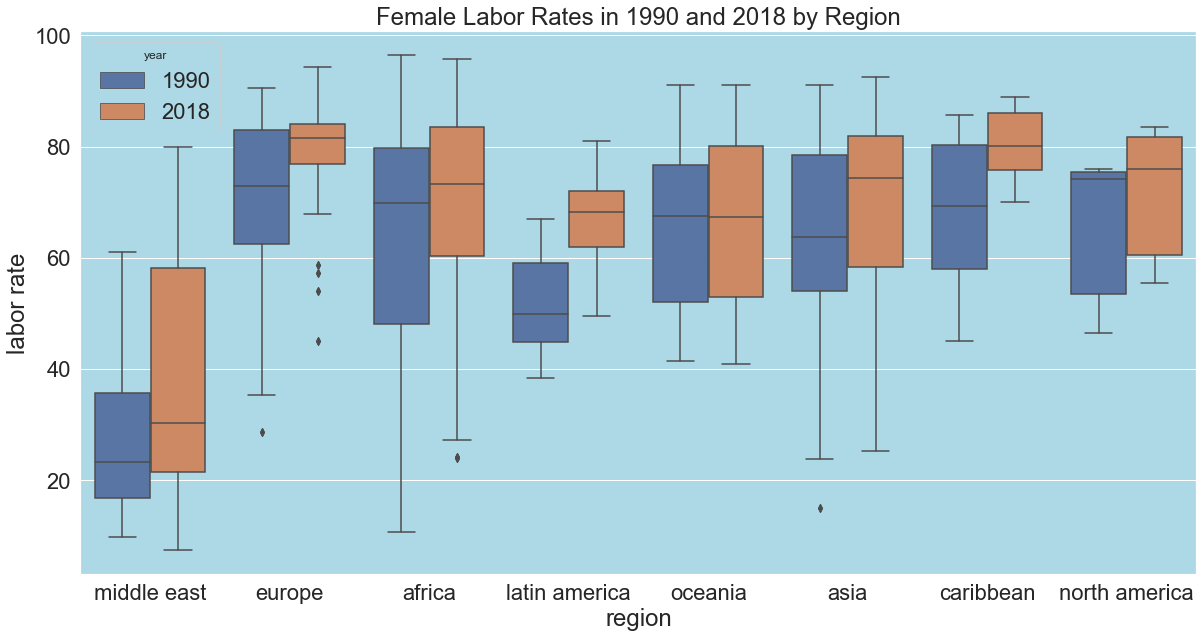

In [1021]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
ax = sns.boxplot(x='region', y='labor rate', data=labor_rate_melted_again, palette='deep', hue='year').set(title='Female Labor Rates in 1990 and 2018 by Region')

RATES IN LATIN AMERICA

In [749]:
region_latam = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['region'] == 'latin america']

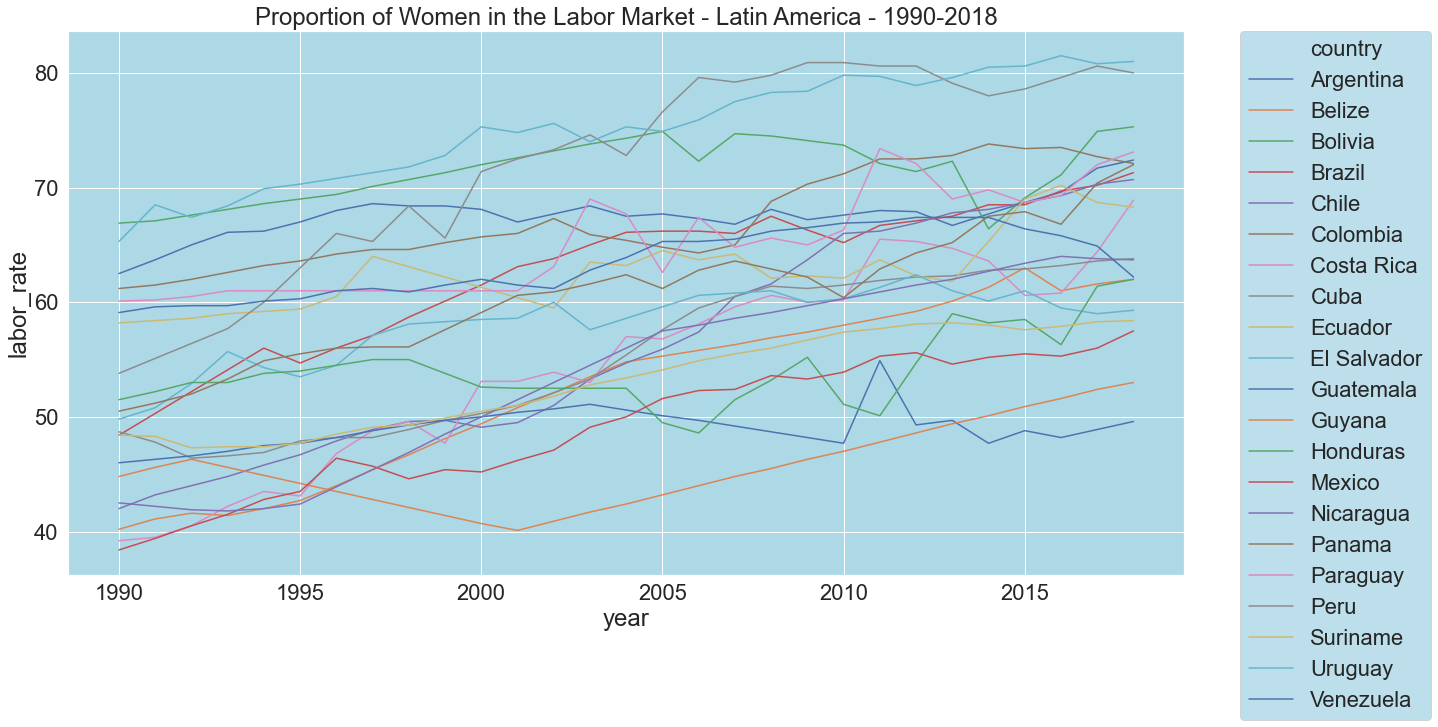

In [1022]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'labor_rate', data=region_latam, hue='country', palette='deep').set(title='Proportion of Women in the Labor Market - Latin America - 1990-2018')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Going to look for the countries that had the min and max values and look at their trajectories

In [713]:
#region_latam['labor_rate'].max()
#region_latam['labor_rate'].min
#max returned 81.5
#min returned 38.4
region_latam.loc[region_latam['labor_rate'] == 81.5]

,country,region,year,labor_rate
5093,Uruguay,latin america,2016,81.5


In [ ]:
labor_mexico = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Mexico']
labor_uruguay = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Uruguay']

[Text(0.5, 1.0, 'Uruguay vs Mexico Labor Rates')]

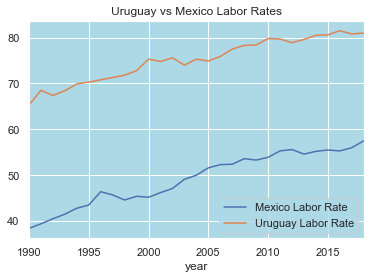

In [942]:
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1)
ax = labor_mexico.plot(x='year', y='labor_rate', label='Mexico Labor Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
labor_uruguay.plot(ax=ax, x='year', y='labor_rate', label='Uruguay Labor Rate').set(title='Uruguay vs Mexico Labor Rates')

RATES IN THE MIDDLE EAST

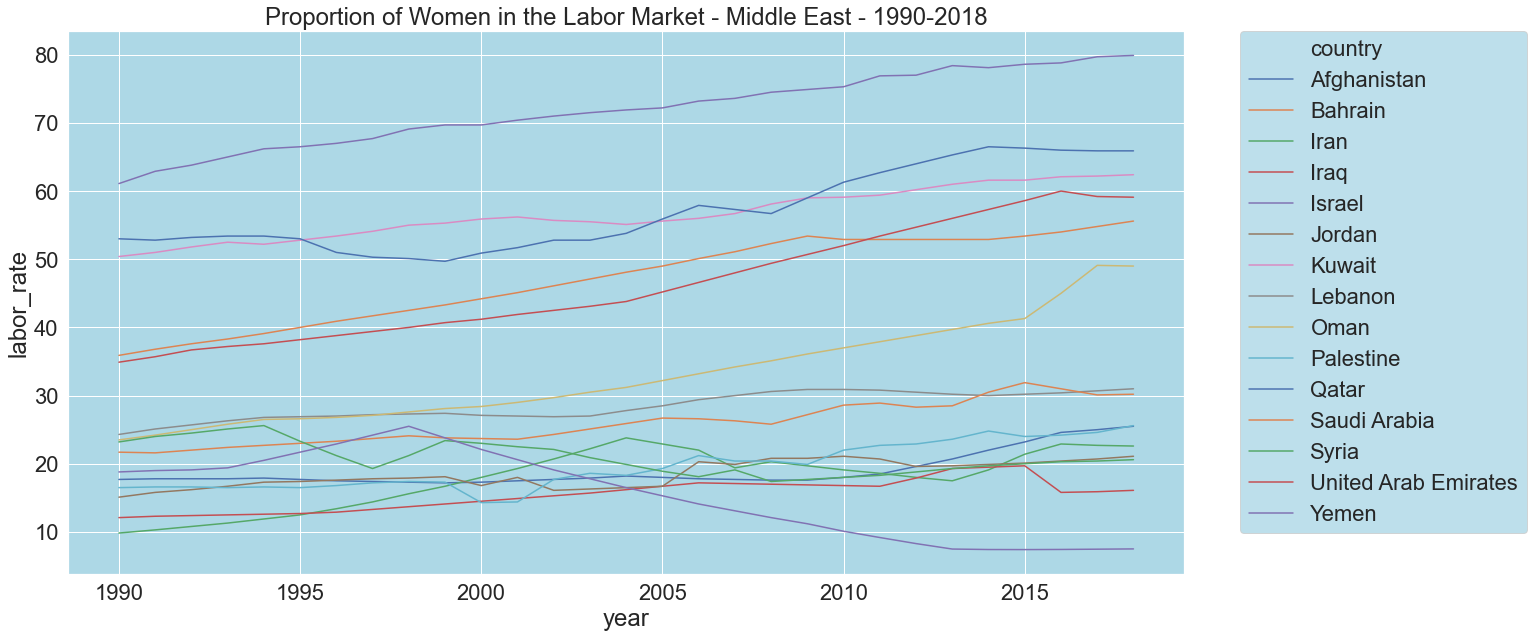

In [1023]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'labor_rate', data=region_mideast, hue='country', palette='deep').set(title='Proportion of Women in the Labor Market - Middle East - 1990-2018')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Comparing min and max from Middle East

In [834]:
#region_mideast['labor_rate'].max()
#region_mideast['labor_rate'].min()
#max returned 79.9
#min returned 7.41
region_mideast.loc[region_mideast['labor_rate'] == 79.9]

,country,region,year,labor_rate
5373,Israel,middle east,2018,79.9


In [838]:
labor_israel = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Israel']
labor_yemen = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Yemen']

[Text(0.5, 1.0, 'Israel vs Yemen Labor Rates')]

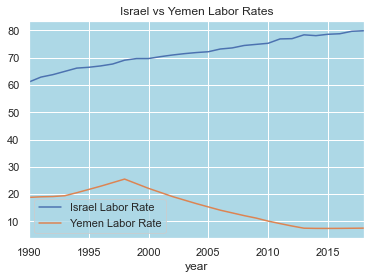

In [839]:
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1)
ax = labor_israel.plot(x='year', y='labor_rate', label='Israel Labor Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
labor_yemen.plot(ax=ax, x='year', y='labor_rate', label='Yemen Labor Rate').set(title='Israel vs Yemen Labor Rates')

### Research Question 2: Is there a relationship between the average education level of women, birthrates, and the proportion of women in workforce? How is this different in different regions?

In [905]:
#q3_female_labor_participation_1990_2008_melted.head()

#merged df of school, labor participation, fertility
q3_school_laborPart_fertility_merged.head()

#school only
#q3_schooling_women_15_44_1990_2008_melted.head()

#fertility only
#q3_total_fertility_1990_2008_melted.head()

,country,region,year,labor_rate,avg yrs of school female 15-44,avg_children_per_woman
0,Afghanistan,middle east,1990,17.7,0.3,7.48
1,Albania,europe,1990,72.5,8.8,2.91
2,Algeria,africa,1990,10.7,4.3,4.48
3,Angola,africa,1990,88.0,2.5,7.19
4,Argentina,latin america,1990,62.5,9.5,2.95


Text(0.5, 0, 'Avg years of schooling - Women ages 15-44')

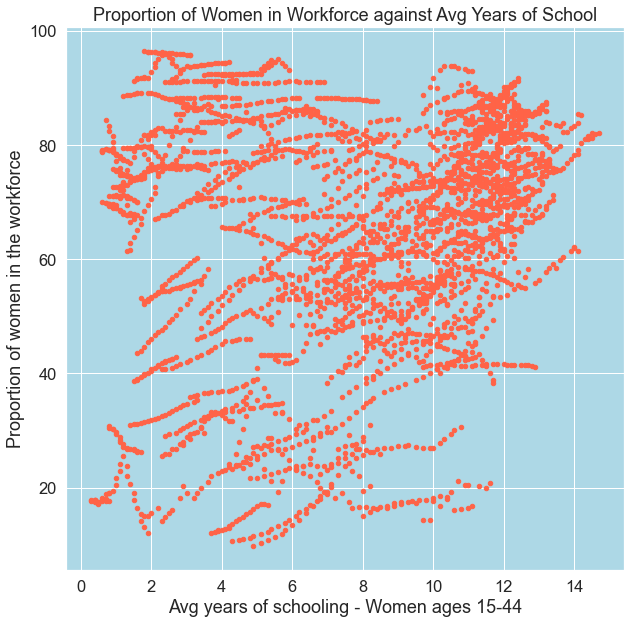

In [927]:
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1.5)
q3_school_laborPart_fertility_merged.plot(x='avg yrs of school female 15-44', y='labor_rate', kind='scatter', figsize=(10,10), color='tomato').set(title='Proportion of Women in Workforce against Avg Years of School');
plt.ylabel('Proportion of women in the workforce')
plt.xlabel('Avg years of schooling - Women ages 15-44')

Text(0.5, 0, 'Avg years of schooling - Women ages 15-44')

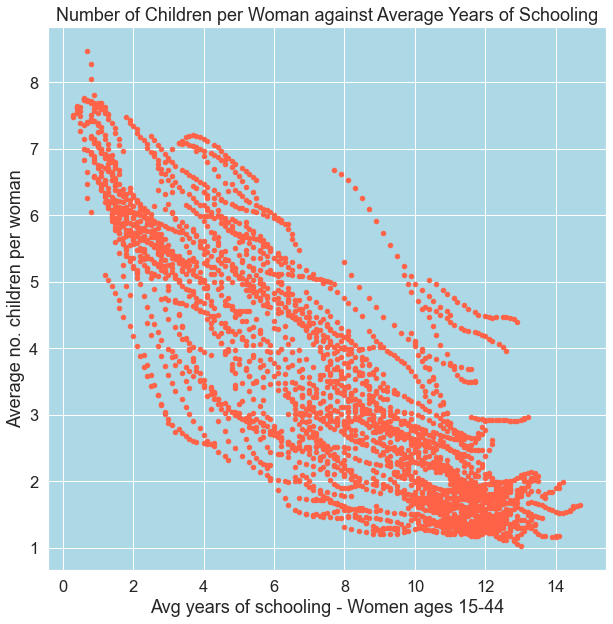

In [924]:
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1.5)
q3_school_laborPart_fertility_merged.plot(x='avg yrs of school female 15-44', y='avg_children_per_woman', kind='scatter', figsize=(10,10), color='tomato').set(title='Number of Children per Woman against Average Years of Schooling')
plt.ylabel('Average no. children per woman')
plt.xlabel('Avg years of schooling - Women ages 15-44')

Text(0.5, 0, 'Proportion of women in the workforce')

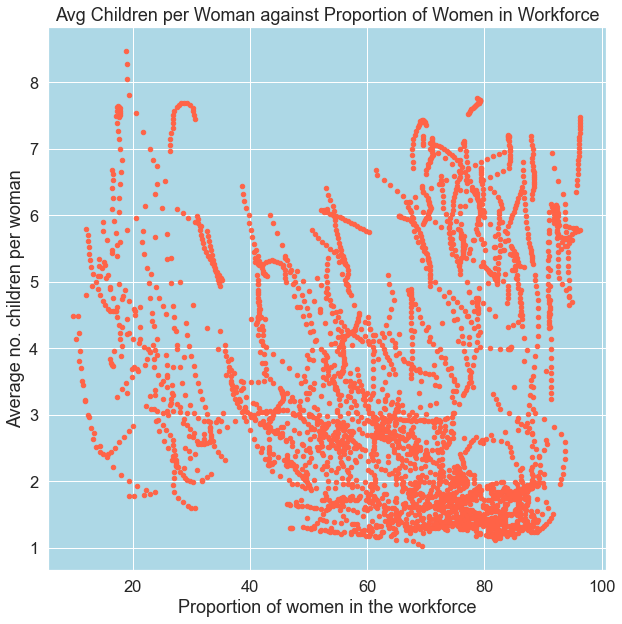

In [926]:
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1.5)
q3_school_laborPart_fertility_merged.plot(x='labor_rate', y='avg_children_per_woman', kind='scatter', figsize=(10,10), color='tomato').set(title='Avg Children per Woman against Proportion of Women in Workforce')
plt.ylabel('Average no. children per woman')
plt.xlabel('Proportion of women in the workforce')

In [978]:
africa_data = q3_school_laborPart_fertility_merged.loc[q3_school_laborPart_fertility_merged['region'] == 'africa']
africa_data.rename(columns = {'avg yrs of school female 15-44':'years_school', 'avg_children_per_woman':'fertility_rate'}, inplace = True)
africa_data.head()

,country,region,year,labor_rate,years_school,fertility_rate
2,Algeria,africa,1990,10.7,4.3,4.48
3,Angola,africa,1990,88.0,2.5,7.19
16,Benin,africa,1990,61.5,1.3,6.68
20,Botswana,africa,1990,58.4,5.1,4.41
24,Burkina Faso,africa,1990,84.3,0.7,6.98


Text(0, 0.5, 'Average Children per Woman')

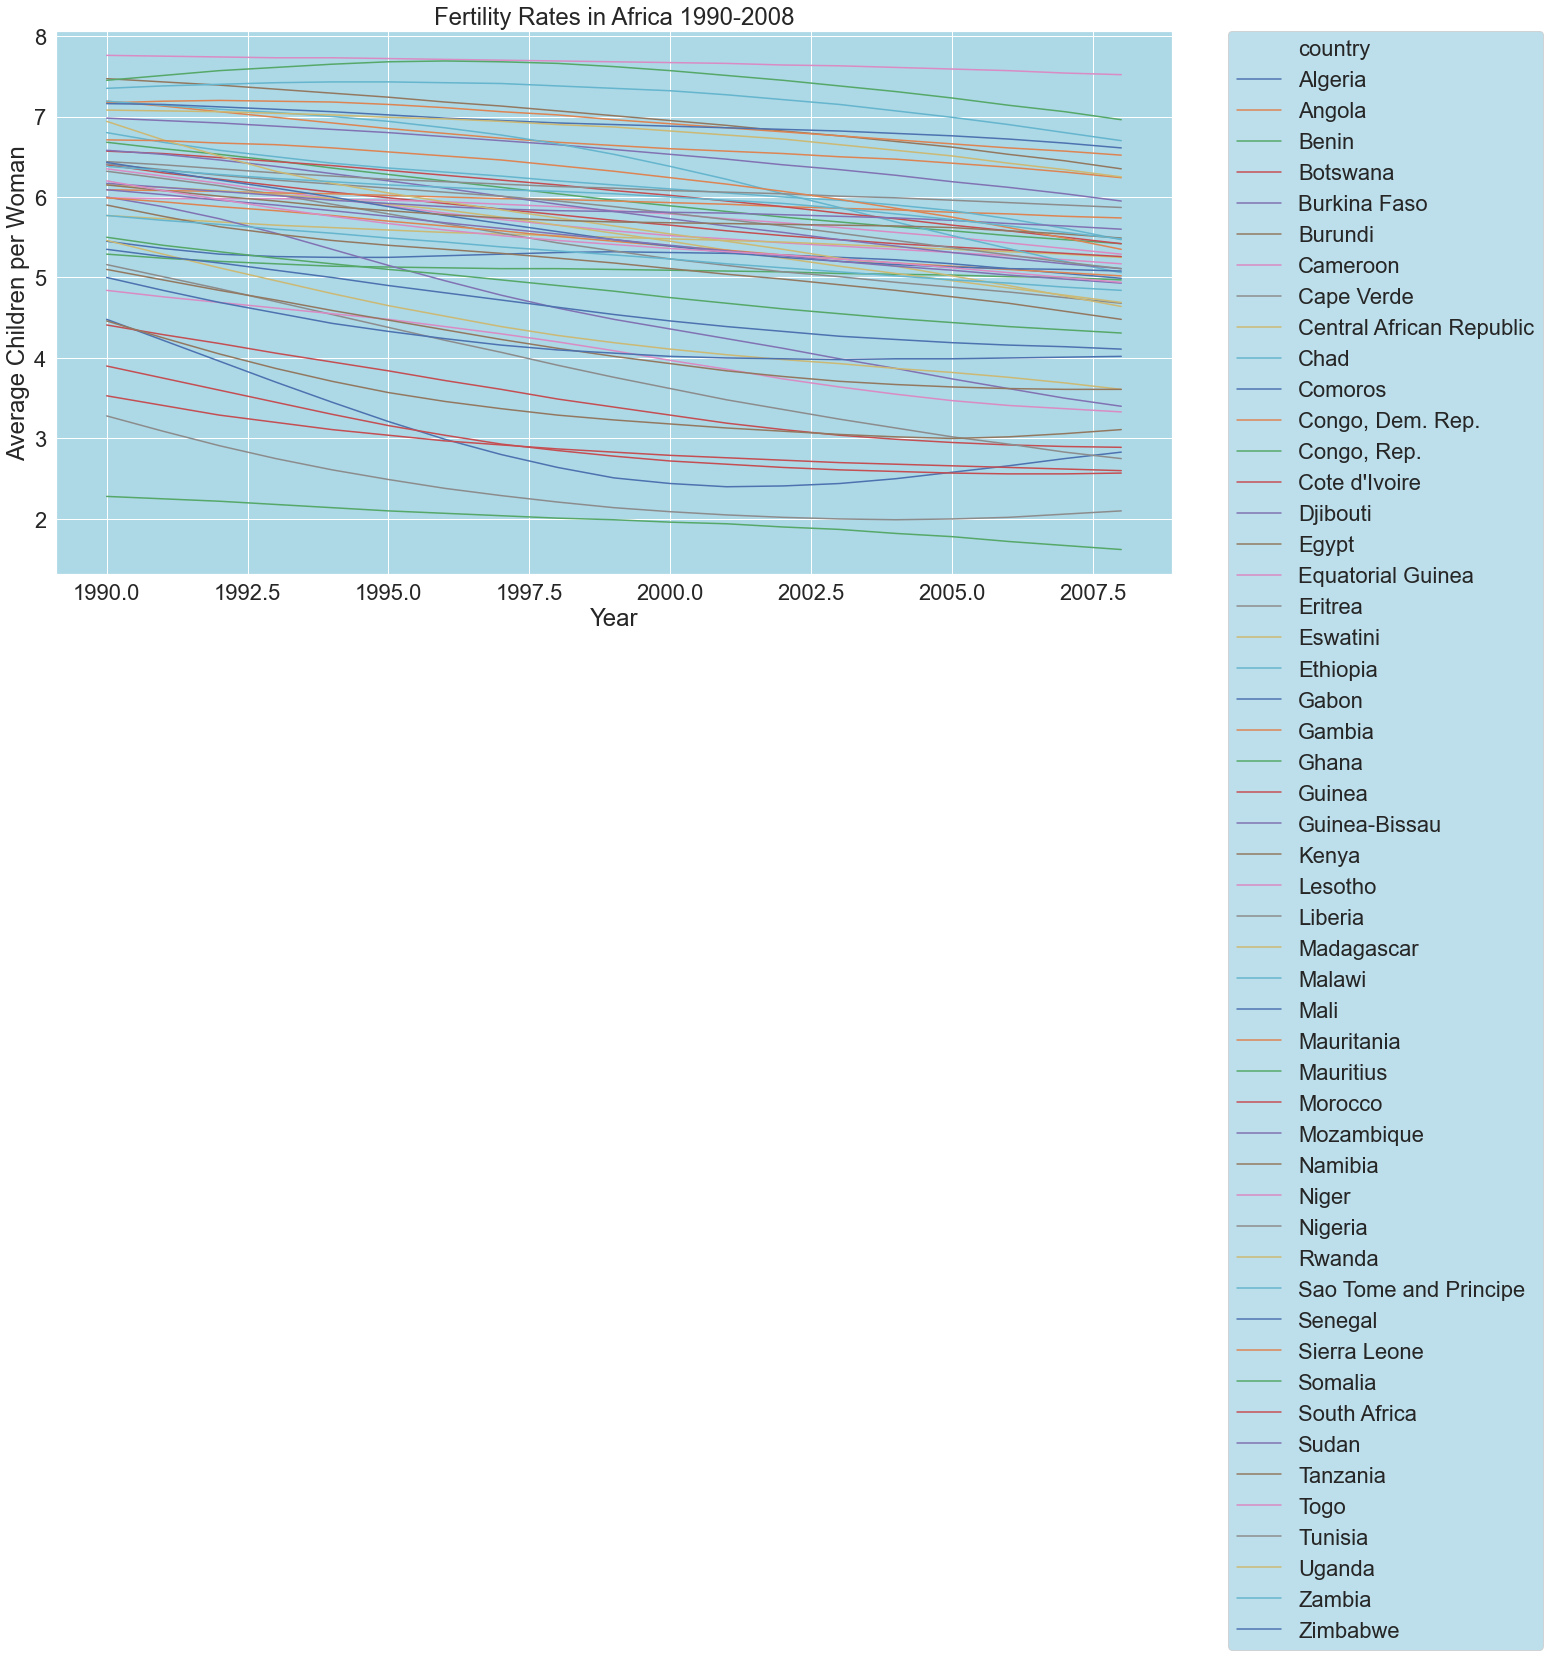

In [994]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'fertility_rate', data=africa_data, hue='country', palette='deep').set(title='Fertility Rates in Africa 1990-2008')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Average Children per Woman')

In [1006]:
africa_means = africa_data.groupby('year', as_index= False).mean()
africa_fertility.tail()
#avg fertility rate 1990 is 5.95
#avg fertility rate 2008 is 4.81
#avg education 1990 is 3.11 years of school
#avg education 2008 is 5.16 years of school

,year,labor_rate,years_school,fertility_rate
14,2004,67.729412,4.707843,5.022941
15,2005,67.919608,4.825490,4.969804
16,2006,68.113725,4.931373,4.916275
17,2007,68.233333,5.052941,4.863725
18,2008,68.372549,5.158824,4.810000


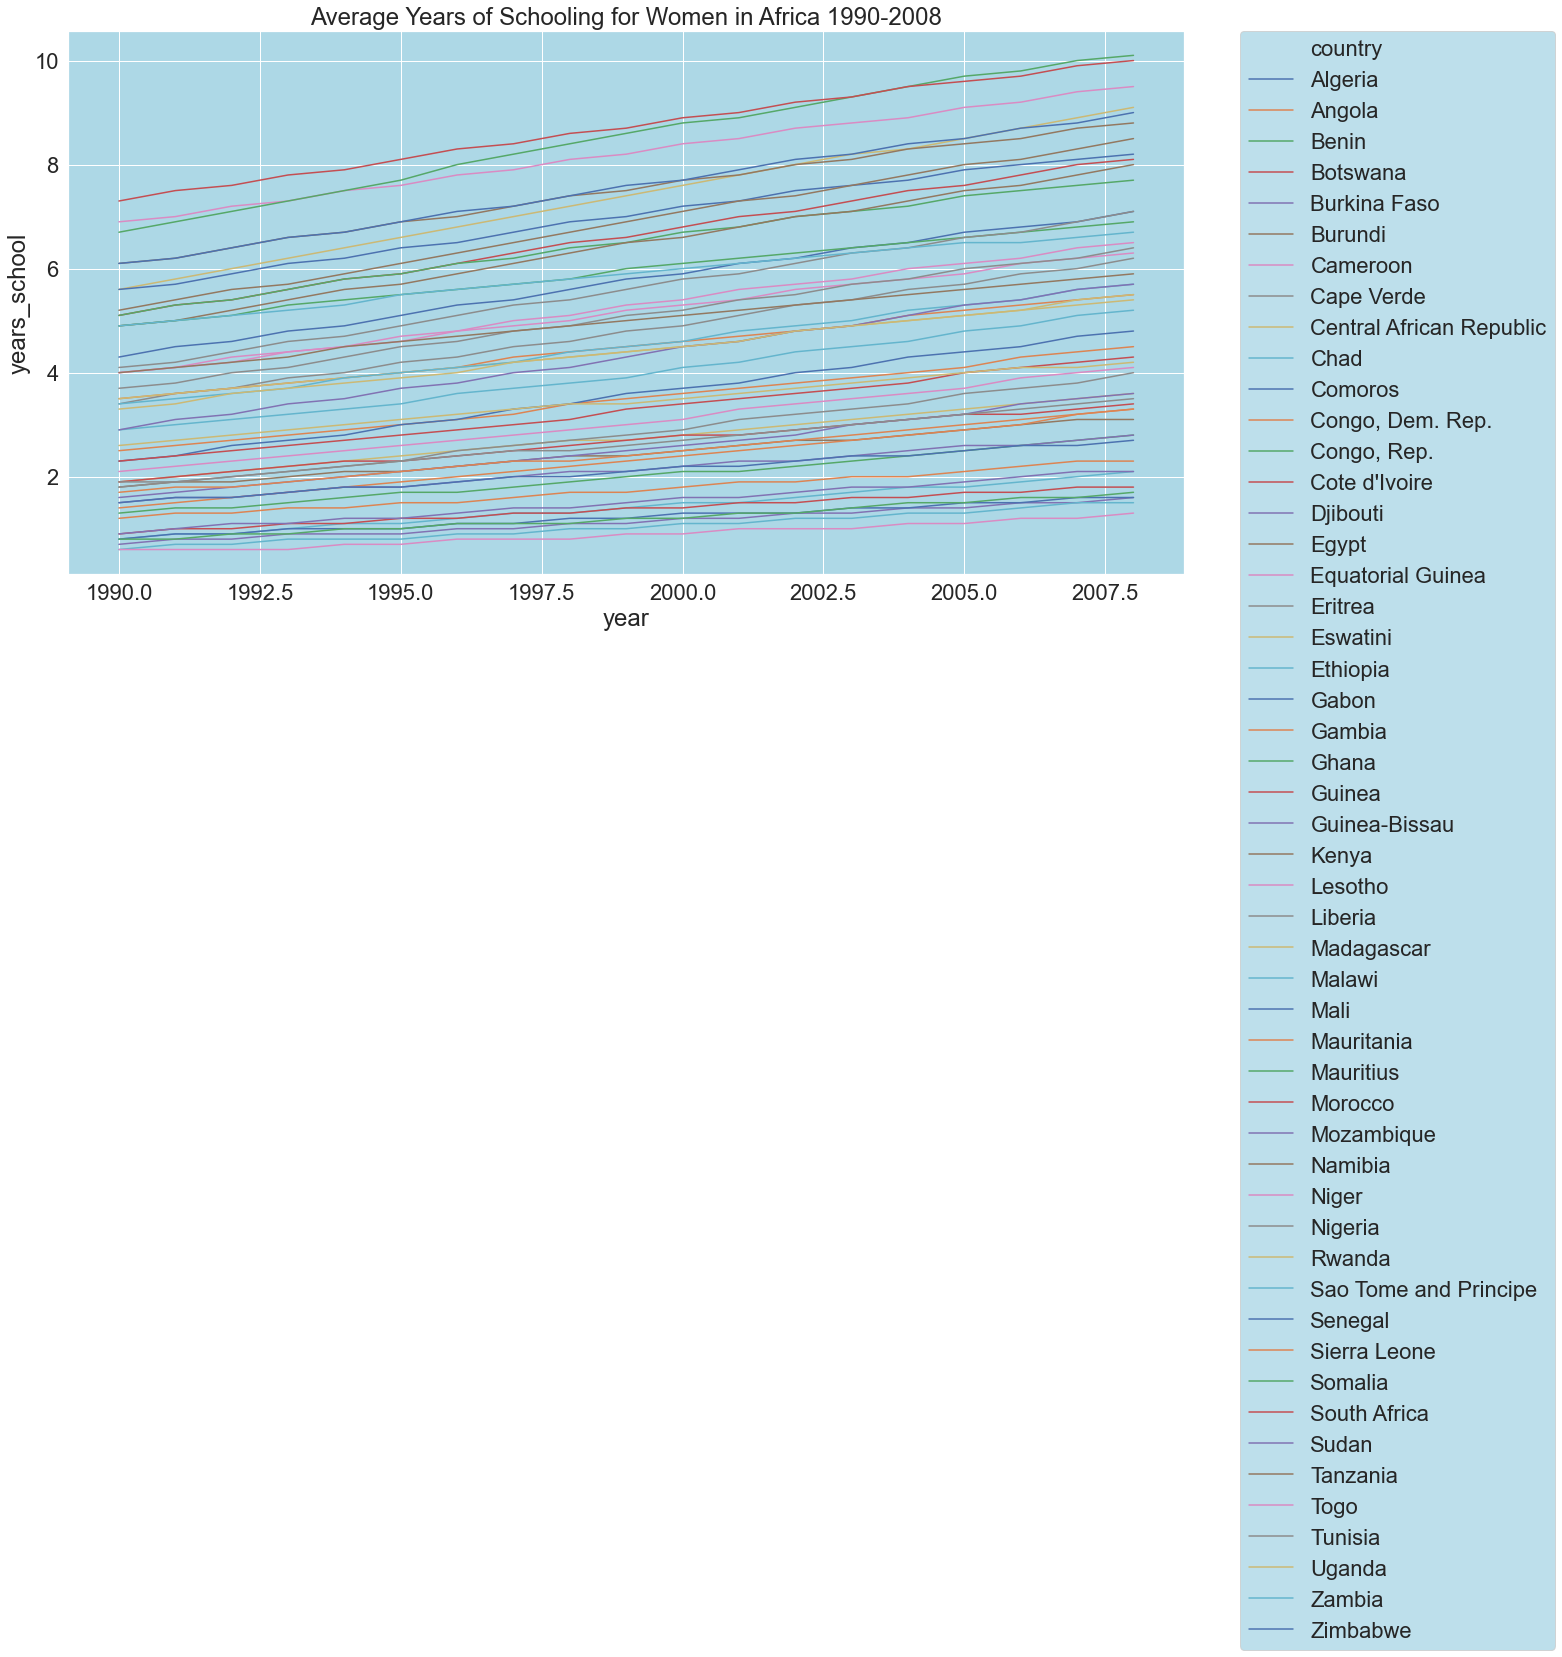

In [997]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'years_school', data=africa_data, hue='country', palette='deep').set(title='Average Years of Schooling for Women in Africa 1990-2008')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

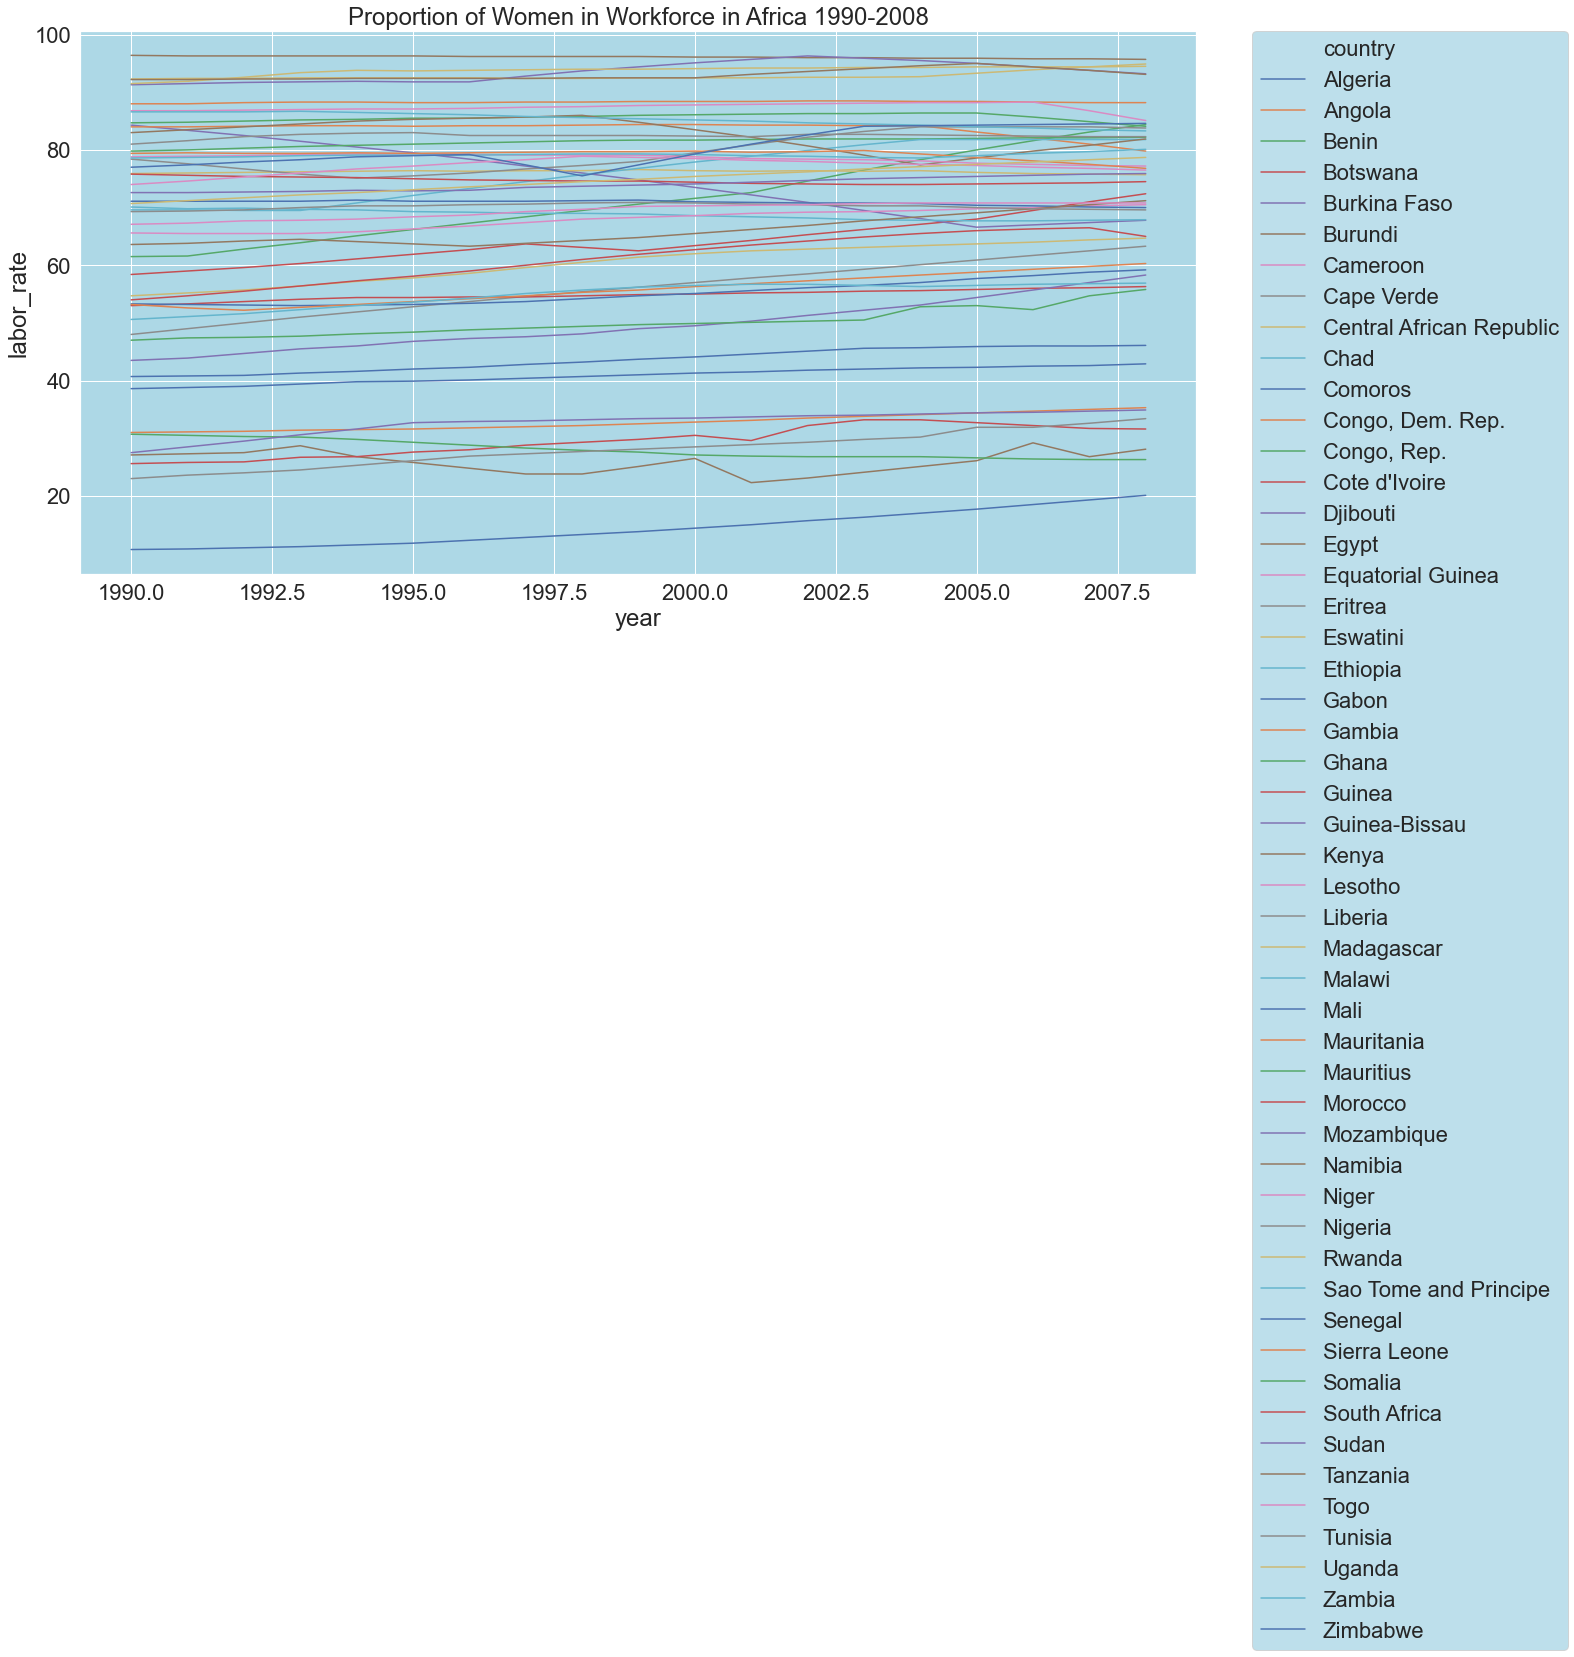

In [1008]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'labor_rate', data=africa_data, hue='country', palette='deep').set(title='Proportion of Women in Workforce in Africa 1990-2008')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<a id='conclusions'></a>
## Conclusions

I've written my conclusions in the accompanying report document.

### Limitations

I've outlined the limitations in the accompanying report document.


In [1010]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295